In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn import metrics
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN
from keras.layers.recurrent import LSTM
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('train.csv', sep='\t')
test_df = pd.read_csv('test.csv', sep='\t')
sample_submission_df = pd.read_csv('sample_submission.csv')

In [3]:
x_train = train_df.drop(columns = ['label'])
print(x_train)
y_train = train_df['label']
y_train = y_train.replace('label', 0, regex=True)

x_test = test_df.drop(columns = ['id'])
y_test = sample_submission_df['label']
y_true = y_test

                                                   text
0     Get the latest from TODAY Sign up for our news...
1     2d  Conan On The Funeral Trump Will Be Invited...
2     It‚Äôs safe to say that Instagram Stories has fa...
3     Much like a certain Amazon goddess with a lass...
4     At a time when the perfect outfit is just one ...
...                                                 ...
4982  The storybook romance of WWE stars John Cena a...
4983  The actor told friends he‚Äôs responsible for en...
4984  Sarah Hyland is getting real.  The Modern Fami...
4985  Production has been suspended on the sixth and...
4986  A jury ruled against Bill Cosby in his sexual ...

[4987 rows x 1 columns]


In [4]:
# Âª∫Á´ãToken
token = Tokenizer(num_words=3800) #‰ΩøÁî®TokenizerÊ®°ÁµÑÂª∫Á´ãtokenÔºåÂª∫Á´ã‰∏ÄÂÄã3800Â≠óÁöÑÂ≠óÂÖ∏
#ËÆÄÂèñÊâÄÊúâË®ìÁ∑¥Ë≥áÊñôÂΩ±Ë©ïÔºå‰æùÁÖßÊØèÂÄãËã±ÊñáÂ≠óÂú®Ë®ìÁ∑¥Ë≥áÊñôÂá∫ÁèæÁöÑÊ¨°Êï∏ÈÄ≤Ë°åÊéíÂ∫èÔºåÂâç3800ÂêçÁöÑËã±ÊñáÂñÆÂ≠óÊúÉÂä†ÈÄ≤Â≠óÂÖ∏‰∏≠
token.fit_on_texts(x_train['text']) 
print(token.word_index) #ÂèØ‰ª•ÁúãÂà∞ÂÆÉÂ∞áËã±ÊñáÂ≠óËΩâÁÇ∫Êï∏Â≠óÁöÑÁµêÊûúÔºå‰æãÂ¶Ç:theËΩâÊèõÊàê1
#ÈÄèÈÅétexts_to_sequencesÂèØ‰ª•Â∞áË®ìÁ∑¥ÂíåÊ∏¨Ë©¶ÈõÜË≥áÊñô‰∏≠ÁöÑÂΩ±Ë©ïÊñáÂ≠óËΩâÊèõÁÇ∫Êï∏Â≠ólist
x_train_seq = token.texts_to_sequences(x_train['text'])
x_test_seq = token.texts_to_sequences(x_test['text']) 
print(x_train_seq)
print(x_test_seq)

{'the': 1, 'and': 2, 'to': 3, 'a': 4, 'of': 5, 'in': 6, 'that': 7, 'on': 8, 'for': 9, 'her': 10, 'was': 11, 'with': 12, 'is': 13, 'she': 14, 'i': 15, 'it': 16, 'as': 17, 'at': 18, 'he': 19, 'his': 20, '‚Äù': 21, 'you': 22, 'have': 23, 'be': 24, 'this': 25, 'by': 26, 'from': 27, 'but': 28, 'has': 29, 'an': 30, 'not': 31, 'their': 32, 'are': 33, 'they': 34, 'about': 35, 'we': 36, 'who': 37, 'said': 38, 'had': 39, 'after': 40, 'up': 41, 'one': 42, 'all': 43, 'so': 44, 'out': 45, 'when': 46, 'been': 47, 'new': 48, 'will': 49, 'were': 50, 'time': 51, 'also': 52, 'my': 53, 'more': 54, 'which': 55, 'first': 56, '‚Äî': 57, 'just': 58, 'like': 59, 'or': 60, 'what': 61, 'people': 62, 'year': 63, 'would': 64, 'me': 65, 'him': 66, 'two': 67, 'show': 68, 'if': 69, 'do': 70, 'now': 71, 'no': 72, 'get': 73, 'there': 74, 'our': 75, 'years': 76, 'can': 77, 'over': 78, '2017': 79, 'know': 80, 'your': 81, 'because': 82, 'while': 83, 'other': 84, 'back': 85, 'some': 86, 'us': 87, 'them': 88, 'into': 89, '

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
# ÊØè‰∏ÄÁØáÂΩ±Ë©ïÊñáÂ≠óÂ≠óÊï∏‰∏çÂõ∫ÂÆöÔºå‰ΩÜÂæåÁ∫åÈÄ≤Ë°åÊ∑±Â∫¶Â≠∏ÁøíÊ®°ÂûãË®ìÁ∑¥ÊôÇÈï∑Â∫¶ÂøÖÈ†àÂõ∫ÂÆö
# Êà™Èï∑Ë£úÁü≠
x_train = sequence.pad_sequences(x_train_seq, maxlen=380)
x_test = sequence.pad_sequences(x_test_seq, maxlen=380)
#Èï∑Â∫¶Â∞èÊñº380ÁöÑÔºåÂâçÈù¢ÁöÑÊï∏Â≠óË£ú0 #Èï∑Â∫¶Â§ßÊñº380ÁöÑÔºåÊà™ÂéªÂâçÈù¢ÁöÑÊï∏Â≠ó
#ËÆäÊàê25000*380ÁöÑÁü©Èô£ = 25000ÂâáË©ïË´ñÔºåÊØèÂâáÂåÖÂê´380ÂÄãÊï∏Â≠ó
print(x_train)
x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
print(x_train)

[[   0    0    0 ... 1008    8  202]
 [   0    0    0 ... 1449    3    8]
 [ 134 2353    6 ...    2  528  699]
 ...
 [   0    0    0 ...  535  391 1791]
 [   0    0    0 ...    1 1022  503]
 [  18  933    5 ...    8 1368  215]]
[[0.000e+00 0.000e+00 0.000e+00 ... 1.008e+03 8.000e+00 2.020e+02]
 [0.000e+00 0.000e+00 0.000e+00 ... 1.449e+03 3.000e+00 8.000e+00]
 [1.340e+02 2.353e+03 6.000e+00 ... 2.000e+00 5.280e+02 6.990e+02]
 ...
 [0.000e+00 0.000e+00 0.000e+00 ... 5.350e+02 3.910e+02 1.791e+03]
 [0.000e+00 0.000e+00 0.000e+00 ... 1.000e+00 1.022e+03 5.030e+02]
 [1.800e+01 9.330e+02 5.000e+00 ... 8.000e+00 1.368e+03 2.150e+02]]


RNN

In [6]:
modelRNN = Sequential()
modelRNN.add(Embedding(output_dim=32, #Ëº∏Âá∫ÁöÑÁ∂≠Â∫¶ÊòØ32ÔºåÂ∏åÊúõÂ∞áÊï∏Â≠ólistËΩâÊèõÁÇ∫32Á∂≠Â∫¶ÁöÑÂêëÈáè
                        input_dim=3800, #Ëº∏ÂÖ•ÁöÑÁ∂≠Â∫¶ÊòØ3800Ôºå‰πüÂ∞±ÊòØÊàëÂÄë‰πãÂâçÂª∫Á´ãÁöÑÂ≠óÂÖ∏ÊòØ3800Â≠ó 
                        input_length=380)) #Êï∏Â≠ólistÊà™Èï∑Ë£úÁü≠ÂæåÈÉΩÊòØ380ÂÄãÊï∏Â≠ó


# Âª∫Á´ãRNNÂ±§ÔºåÂª∫Á´ã16ÂÄãÁ•ûÁ∂ìÂÖÉÁöÑRNNÂ±§
modelRNN.add(SimpleRNN(units=16))
# Âª∫Á´ãÈö±ËóèÂ±§ÔºåÂª∫Á´ã256ÂÄãÁ•ûÁ∂ìÂÖÉÁöÑÈö±ËóèÂ±§ÔºåReLUÊøÄÊ¥ªÂáΩÊï∏
modelRNN.add(Dense(units=256,activation='relu'))
#Èö®Ê©üÂú®Á•ûÁ∂ìÁ∂≤Ë∑Ø‰∏≠ÊîæÊ£Ñ70%ÁöÑÁ•ûÁ∂ìÂÖÉÔºåÈÅøÂÖçoverfitting
modelRNN.add(Dropout(0.7)) 
# Âª∫Á´ãËº∏Âá∫Â±§ÔºåSigmoidÊøÄÊ¥ªÂáΩÊï∏
modelRNN.add(Dense(units=1,activation='sigmoid')) #Âª∫Á´ã‰∏ÄÂÄãÁ•ûÁ∂ìÂÖÉÁöÑËº∏Âá∫Â±§
modelRNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 380, 32)           121600    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 16)                784       
_________________________________________________________________
dense (Dense)                (None, 256)               4352      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 126,993
Trainable params: 126,993
Non-trainable params: 0
_________________________________________________________________


In [7]:
# ÂÆöÁæ©Ë®ìÁ∑¥Ê®°Âûã
modelRNN.compile(loss='binary_crossentropy',
                 optimizer='adam', 
                 metrics=['accuracy'])

In [8]:
#Loss function‰ΩøÁî®Cross entropy 
#adamÊúÄÂÑ™ÂåñÊñπÊ≥ïÂèØ‰ª•Êõ¥Âø´Êî∂ÊñÇ
train_history = modelRNN.fit(x_train,
                             y_train, 
                             epochs=10,
                             batch_size=100, 
                             verbose=2, 
                             validation_split=0.2)

Epoch 1/10
40/40 - 2s - loss: 0.6819 - accuracy: 0.5723 - val_loss: 0.6731 - val_accuracy: 0.5922
Epoch 2/10
40/40 - 2s - loss: 0.6462 - accuracy: 0.6144 - val_loss: 0.6623 - val_accuracy: 0.6263
Epoch 3/10
40/40 - 2s - loss: 0.5197 - accuracy: 0.7566 - val_loss: 0.7228 - val_accuracy: 0.5691
Epoch 4/10
40/40 - 2s - loss: 0.2621 - accuracy: 0.9153 - val_loss: 0.9258 - val_accuracy: 0.5812
Epoch 5/10
40/40 - 2s - loss: 0.1107 - accuracy: 0.9677 - val_loss: 1.1548 - val_accuracy: 0.5842
Epoch 6/10
40/40 - 2s - loss: 0.0547 - accuracy: 0.9860 - val_loss: 1.3442 - val_accuracy: 0.5832
Epoch 7/10
40/40 - 2s - loss: 0.0403 - accuracy: 0.9887 - val_loss: 1.5217 - val_accuracy: 0.5762
Epoch 8/10
40/40 - 2s - loss: 0.0357 - accuracy: 0.9892 - val_loss: 1.5367 - val_accuracy: 0.5651
Epoch 9/10
40/40 - 2s - loss: 0.0300 - accuracy: 0.9922 - val_loss: 1.5613 - val_accuracy: 0.5822
Epoch 10/10
40/40 - 2s - loss: 0.0229 - accuracy: 0.9940 - val_loss: 1.5649 - val_accuracy: 0.5892


In [9]:
scores = modelRNN.evaluate(x_test, y_true,verbose=1)
print(scores[1])

39/39 [==============================] - 0s 8ms/step - loss: 2.1632 - accuracy: 0.4916
0.4915798008441925


In [10]:
def show_train_history(train, val, accuracy_or_loss):
    # accuracy_or_loss : input 'Accuracy' or 'loss'
    plt.figure()
    plt.plot(train_history.history[train]) 
    plt.plot(train_history.history[val])
    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel(accuracy_or_loss)
    plt.legend(["train", "validation"], loc="upper left") 
    plt.show()

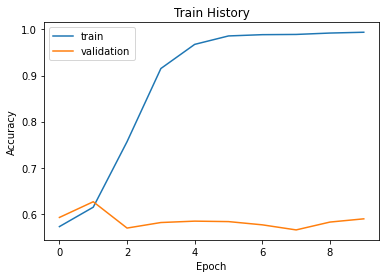

In [11]:
show_train_history('accuracy', 'val_accuracy', 'Accuracy')

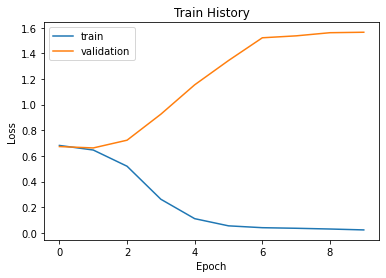

In [12]:
show_train_history('loss', 'val_loss', 'Loss')

LSTM

In [13]:
modelLSTM = Sequential() #Âª∫Á´ãÊ®°Âûã
modelLSTM .add(Embedding(output_dim=32, #Ëº∏Âá∫ÁöÑÁ∂≠Â∫¶ÊòØ32ÔºåÂ∏åÊúõÂ∞áÊï∏Â≠ólistËΩâÊèõÁÇ∫32Á∂≠Â∫¶ÁöÑÂêëÈáè
                         input_dim=3800, #Ëº∏ÂÖ•ÁöÑÁ∂≠Â∫¶ÊòØ3800Ôºå‰πüÂ∞±ÊòØÊàëÂÄë‰πãÂâçÂª∫Á´ãÁöÑÂ≠óÂÖ∏ÊòØ3800Â≠ó
                         input_length=380)) #Êï∏Â≠ólistÊà™Èï∑Ë£úÁü≠ÂæåÈÉΩÊòØ380ÂÄãÊï∏Â≠ó

# Âª∫Á´ãLSTMÂ±§ 
modelLSTM .add(LSTM(32)) #Âª∫Á´ã32ÂÄãÁ•ûÁ∂ìÂÖÉÁöÑLSTMÂ±§
# Âª∫Á´ãÈö±ËóèÂ±§
modelLSTM .add(Dense(units=256,activation='relu')) #Âª∫Á´ã256ÂÄãÁ•ûÁ∂ìÂÖÉÁöÑÈö±ËóèÂ±§
modelLSTM .add(Dropout(0.7))
# Âª∫Á´ãËº∏Âá∫Â±§ÔºåÂª∫Á´ã‰∏ÄÂÄãÁ•ûÁ∂ìÂÖÉÁöÑËº∏Âá∫Â±§
modelLSTM .add(Dense(units=1,activation='sigmoid'))
# Êü•ÁúãÊ®°ÂûãÊëòË¶Å
modelLSTM .summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 380, 32)           121600    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               8448      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 138,625
Trainable params: 138,625
Non-trainable params: 0
_________________________________________________________________


In [14]:
modelLSTM.compile(loss='binary_crossentropy',
                 optimizer='adam', 
                 metrics=['accuracy'])
#Loss function‰ΩøÁî®Cross entropy 
#adamÊúÄÂÑ™ÂåñÊñπÊ≥ïÂèØ‰ª•Êõ¥Âø´Êî∂ÊñÇ
train_history = modelLSTM.fit(x_train,
                             y_train, 
                             epochs=10,
                             batch_size=100, 
                             verbose=2, 
                             validation_split=0.2)

Epoch 1/10
40/40 - 5s - loss: 0.6801 - accuracy: 0.5966 - val_loss: 0.6724 - val_accuracy: 0.5922
Epoch 2/10
40/40 - 5s - loss: 0.6416 - accuracy: 0.6285 - val_loss: 0.6318 - val_accuracy: 0.6293
Epoch 3/10
40/40 - 5s - loss: 0.4936 - accuracy: 0.7776 - val_loss: 0.6218 - val_accuracy: 0.6834
Epoch 4/10
40/40 - 5s - loss: 0.3466 - accuracy: 0.8549 - val_loss: 0.7430 - val_accuracy: 0.6603
Epoch 5/10
40/40 - 5s - loss: 0.2620 - accuracy: 0.8987 - val_loss: 0.8358 - val_accuracy: 0.6914
Epoch 6/10
40/40 - 5s - loss: 0.1910 - accuracy: 0.9323 - val_loss: 1.0642 - val_accuracy: 0.6493
Epoch 7/10
40/40 - 5s - loss: 0.1189 - accuracy: 0.9584 - val_loss: 1.1790 - val_accuracy: 0.6673
Epoch 8/10
40/40 - 5s - loss: 0.0819 - accuracy: 0.9742 - val_loss: 1.5168 - val_accuracy: 0.6463
Epoch 9/10
40/40 - 5s - loss: 0.0604 - accuracy: 0.9830 - val_loss: 1.6410 - val_accuracy: 0.6493
Epoch 10/10
40/40 - 5s - loss: 0.0494 - accuracy: 0.9875 - val_loss: 1.7623 - val_accuracy: 0.6533


In [15]:
scores = modelLSTM.evaluate(x_test, y_true, verbose=1)
print(scores[1])

39/39 [==============================] - 1s 14ms/step - loss: 3.0547 - accuracy: 0.4852
0.4851644039154053


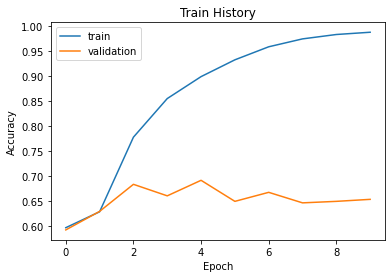

In [16]:
show_train_history('accuracy', 'val_accuracy', 'Accuracy')

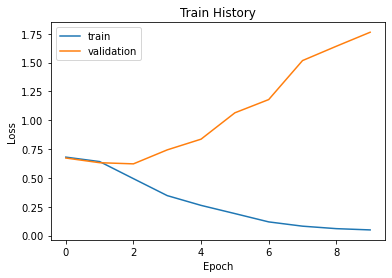

In [17]:
show_train_history('loss', 'val_loss', 'Loss')